In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Functions

In [ ]:
# import needed libraries
%%capture
!pip install easyocr
!pip install keras-ocr
import keras_ocr   
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import re
from google.colab.patches import cv2_imshow

In [ ]:
#install needed libraries
%%capture
!sudo apt install tesseract-ocr
!apt-get install tess
!apt-get install tesseract-ocr-eng

!pip install -U git+https://github.com/madmaze/pytesseract.git
from PIL import Image
import pytesseract

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow import keras

# load classification model
model = keras.models.load_model("/content/drive/MyDrive/Ogunleye Project/CODES/Models/CNNmodel", compile=False)

In [ ]:
#wrapper function to classify currency notes
def make_prediction(path):
  img= None
  if type(path) is type(""):
    img= cv2.imread(path, 1)
  if type(path) is type(np.array([0,1])):
    img= path
  
  img= cv2.resize(img, dsize=(128, 128), interpolation= cv2.INTER_LINEAR)
  img= img/255
  shape= (1, 128, 128, 3)
  arr= np.zeros(shape)
  arr[0]= img
  pred= model.predict(arr)
  prediction= pred.argmax(axis=1)[0]

  return prediction


# crop serial number number out of image based on location in each currency
def get_crop(path):
  if type(path) is type(""):
    img= cv2.imread(path, 1)
  if type(path) is type(np.array([0,1])):
    img= path
  img= cv2.resize(img, dsize=(1100, 550), interpolation= cv2.INTER_LINEAR)
  A= [0,1,2,3]
  B= [4,5,6] 
  C= [7]
  crop= 0

  if make_prediction(path) == 0: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 1: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 2: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 3: 
    crop= img[400:470, 770:1150]
  if make_prediction(path) == 4: 
    crop= img[100:190, 760:1020]
  if make_prediction(path) == 5: 
    crop= img[100:190, 750:1000]
  if make_prediction(path) == 6: 
    crop= img[100:190, 720:1000]
  if make_prediction(path) == 7: 
    crop= img[30:120, 50:290]

  return crop

In [ ]:
# functions to apply image preprocessing to images

def process_image(path):
  #crop the image
  img= cv2.cvtColor(get_crop(path), cv2.COLOR_BGR2RGB) 

  #apply gray scaling
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #apply bilateral filter for noise reduction
  bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 

  #apply canny edge filtering for edge detection
  edged = cv2.Canny(bfilter, 30, 200) #Edge detection
  
  #cv2_imshow(edged)
  #edged_complete= cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
  #plt.imshow(edged_complete)

  return edged

In [ ]:
#FUNCTION FOR EASYOCR
def apply_easyocr(edged):
  reader= easyocr.Reader(["en"])
  result= reader.readtext(edged)
  result

  top_left = tuple(result[0][0][0])
  bottom_right = tuple(result[0][0][2])

  text= ""
  for i in result:
    text+= i[1]
  
  
  compressed_text=""
  for i in text:
    if(i == " "): continue
    compressed_text+= i

  font = cv2.FONT_HERSHEY_SIMPLEX

  edged= cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
  #annotated_image = cv2.rectangle(edged, np.float(top_left),np.float(bottom_right),(0,255,0),3)
  annotated_image = cv2.rectangle(edged, (13, 17),(233, 55),(0,255,0),3)
  annotated_image = cv2.putText(annotated_image, compressed_text,top_left, font, 0.7,(255,255,255),2,cv2.LINE_AA)
  #plt.imshow(annotated_image)

  

  return [annotated_image, compressed_text]

In [ ]:
#FUNCTION FOR KERAS_OCR
def apply_kerasocr(edged):
  cv2.imwrite("edged.jpg", edged)
  path= "/content/edged.jpg"

  pipeline = keras_ocr.pipeline.Pipeline()
  images = [ keras_ocr.tools.read(path)]
  prediction= pipeline.recognize(images)

  compressed_text= prediction[0][0][0]
  #top_left = tuple((p[0][0][1][0]).tolist())
  #bottom_right = tuple((p[0][0][1][3]).tolist())

  
  font = cv2.FONT_HERSHEY_SIMPLEX

  edged= cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
  annotated_image = cv2.rectangle(edged, (13, 17),(233, 55),(0,255,0),3)
  annotated_image = cv2.putText(annotated_image, compressed_text,(13,17), font, 0.7,(255,255,255),2,cv2.LINE_AA)

  return [annotated_image, compressed_text]


In [ ]:
#FUNCTION FOR PYTESSERACT
def apply_pytesseract(edged):

  prediction= pytesseract.image_to_string(edged)
  pattern= "\n.*"
  compressed_text= (re.sub(pattern, "", prediction)).strip()


  font = cv2.FONT_HERSHEY_SIMPLEX

  edged= cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)
  annotated_image = cv2.rectangle(edged, (13, 17),(233, 55),(0,255,0),3)
  annotated_image = cv2.putText(annotated_image, compressed_text,(13,17), font, 0.7,(255,255,255),2,cv2.LINE_AA)

  return [annotated_image, compressed_text]


## Consolidate/Test

In [ ]:
path = "/content/drive/MyDrive/Ogunleye Project/DATASET/Nigerian Currency dataset/ADEKCURR-DB/5 naira/5-front-11.jpg"

Easyocr

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


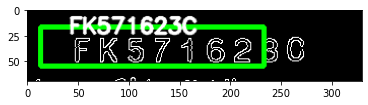

In [ ]:
#perform image preprocessing
edged= process_image(path)

#apply easy ocr
easyocr_out= apply_easyocr(edged)

# show output as an image
plt.imshow(easyocr_out[0])

Kerasocr

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


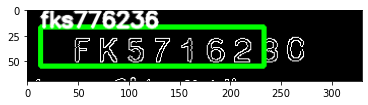

In [ ]:
#perform image preprocessing
edged= process_image(path)

# apply_kerasocr
kerasocr_out= apply_kerasocr(edged)

# show output as an image
plt.imshow(kerasocr_out[0])

Pytesseract

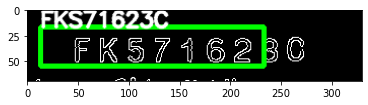

In [ ]:
#perform image preprocessing
edged= process_image(path)

# apply_kerasocr
pytesseract_out= apply_pytesseract(edged)

# show output as an image
plt.imshow(pytesseract_out[0])

In [ ]:
pytesseract_out[1]

'FKS71623C'

In [ ]:
print(easyocr_out[1], kerasocr_out[1], pytesseract_out[1])

FK571623C fks776236 FKS71623C


#Store all predictions on test data

In [ ]:
#load dataset
import pickle
test_images= pickle.load(open("/content/drive/MyDrive/Ogunleye Project/CODES/pickled files/filtered_final_images.pkl", "rb"))

In [ ]:
# function to predict for all images in dataset using any OCR tool given as input

def pred_currency(currency_list, method):
  res= []
  #img_path= "/content/tmp.jpg"
  if(method)== "easyocr":
    for image in currency_list:
      #cv2.imwrite(img_path, image) 
      edged= process_image(image)
      easyocr_out= apply_easyocr(edged)
      res.append(easyocr_out[1])
      #!rm -f img_path

  if(method)== "kerasocr":
    for image in currency_list: 
      #cv2.imwrite(img_path, image) 
      edged= process_image(image)
      kerasocr_out= apply_kerasocr(edged)
      res.append(kerasocr_out[1])
      #!rm -f img_path

  if(method)== "pytesseract":
    for image in currency_list: 
      #cv2.imwrite(img_path, image) 
      edged= process_image(image)
      pytesseract_out= apply_pytesseract(edged)
      res.append(pytesseract_out[1])
      #!rm -f img_path

  return res

def get_test_pred(test_images, method):
  test_pred= []
  for currency_list in test_images:
    test_pred.append(pred_currency(currency_list, method))

  return test_pred

In [ ]:
# get predictions
test_pred_easyocr= get_test_pred(test_images, "easyocr")
test_pred_kerasocr= get_test_pred(test_images, "kerasocr")
test_pred_pytesseract= get_test_pred(test_images, "pytesseract")

In [ ]:
# check if the predictions from all tool are of the same and correct dimensions

print(len(test_images), len(test_pred_easyocr), len(test_pred_kerasocr), len(test_pred_pytesseract))
print("/n")

if ((np.array(test_images)).size) ==  ((np.array(test_pred_easyocr)).size) == ((np.array(test_pred_kerasocr)).size) == ((np.array(test_pred_pytesseract)).size):
  print("Hurray, they are all of the same sizes")
else:
  print("NOPE, didn't work")

8 8 8 8
/n
Hurray, they are all of the same sizes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [ ]:
# visualize prediction of currency notes
n= 0
j=0
print("EASYOCR"+"  KERASOCR"+" PYTESSERACT")
for i in range(len(test_pred_easyocr[0])):
  print(test_pred_easyocr[0][i], test_pred_kerasocr[0][i], test_pred_pytesseract[0][i])
  

EASYOCR  KERASOCR PYTESSERACT
ET9€43079OA{ln3mi 43479 Cae ec aS)
X10395602 xqa3gse0z pO Tob Lhe
475665 d09475665 DO947S5665
ES1391149 es1391149 ES1391149
EP248843980 ep2488435 EP 2488439
€53@5069 des3450e9 DES345069
FQ1877271 fo18t7271 Onn Waraca ae
EP92919357ad/eein ep9291935 EP9281935
Em7272290(OCCLI emt2722go aC ecm meen)
M96&4191 dm9614191 Ror a minon|
EU9425416 euga2s416 EUQS425416
0501487& deso148te DUSO14878
EZ0611953TeiGLRC8on e10611953 EP AOL n CER,
ES0229567QJ eso22958t ESO229567
FK571623C fks776236 FKS71623C
DM5453260GlEL dms453290 DMS453260
B0205301 bvo205301 BVO205301
0w52<16856BM 591b85 Oar meres
AR70980478384 arto98047 Tae eC wae
GB16$€843 cb1678883 CB16%16843
EG9694826154@ eg9694826 CR ROR RES Eeno)
Ez5717765alkaChuvcordklnira?lx ez5717765 EZ8717765


In [ ]:
# save predictions in variable
final_test_pred=  [test_pred_easyocr, test_pred_kerasocr, test_pred_pytesseract]

In [ ]:
# save predictions variable to drive storage
pickle.dump(final_test_pred, open("/content/drive/MyDrive/Ogunleye Project/CODES/pickled files/final_test_pred.pkl", "wb"))